In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
stock_list = [3.5, 5, 2, 8, 4.2]

In [11]:
returns = np.array(stock_list)
print(returns)
type(returns)

[3.5 5.  2.  8.  4.2]


numpy.ndarray

In [12]:
returns.shape

(5,)

In [13]:
print(np.log(returns))

[1.25276297 1.60943791 0.69314718 2.07944154 1.43508453]


In [14]:
print ("Mean: ", np.mean(returns), "Std Dev: ", np.std(returns))

Mean:  4.54 Std Dev:  1.9915822855207364


In [15]:
# simulate a universe of stocks using NumPy's functions. 
# first create the arrays to hold the assets and returns that will use to build a portfolio. 

N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

In [16]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.

X = np.random.normal(0, 1, 100)

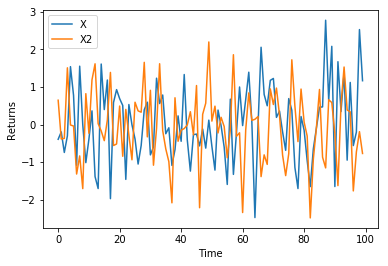

In [17]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

In [ ]:
# Take the average of the last 60 days at each timepoint.

MAVG = X.rolling(X, window=60).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

In [18]:
X

array([-0.39198912, -0.1954534 , -0.74321363, -0.30155333,  1.54237283,
        0.77940828, -1.08531595,  1.5546534 , -0.00474447, -1.01461542,
       -0.38747923,  0.36491338, -1.38641571, -1.70435423,  1.6119055 ,
        0.39884608,  1.18608075, -1.97368622,  0.58656771,  0.93079994,
        0.68968915,  0.50917513, -1.46042735,  0.53328634, -0.00524957,
       -0.38442055, -1.0521933 , -0.55785543,  0.3928581 ,  0.59564872,
       -0.80745085, -0.5979635 ,  1.23489977,  0.55919064,  0.78677329,
       -0.24483788, -0.08590903, -1.08792466, -0.66794901,  0.23101077,
       -0.44546069,  1.33259714, -0.40871545, -1.23969849, -0.26869578,
       -0.25420458, -0.56847714, -0.11906171, -0.62748782,  0.11756443,
       -0.57974098, -1.21339403,  0.38559168, -0.03335963, -0.60120833,
       -1.59511292,  0.67675141, -1.32734538, -0.21272454,  1.00036537,
       -0.02744867,  0.66814842,  1.39446757,  0.06579946, -2.4775112 ,
       -0.04411155,  2.05885301,  0.80131285,  0.500226  ,  1.17

Now we will simulate a base asset. 
We want the universe of stocks to be correlated with each other,
so we will use this initial value to generate the others.


In [19]:
# draw 𝑁=100 random samples from a normal distribution with mean=1.01 and std=0.03

R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)


In [20]:
# np.cumprod(a,axis=None, dtype=None, out=None)
# by default no axis is used, the input is flattened
# take an input array a and return the cumulative product of elements along a given axis.

In [21]:
a = np.array([1,2,3])
np.cumprod(a)

array([1, 2, 6])

In [22]:
a = np.array([[1, 2, 3], [4, 5, 6]])
np.cumprod(a, dtype=float)

array([  1.,   2.,   6.,  24., 120., 720.])

In [23]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
np.cumprod(a,axis=0)

array([[ 1,  2,  3],
       [ 4, 10, 18]])

In [25]:
np.cumprod(a,axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]])

In [26]:
R_1

array([1.01365961, 1.01620931, 0.99288307, 1.0367844 , 1.05554404,
       1.01562503, 0.99184478, 0.98093707, 1.0128679 , 1.01314124,
       0.99310029, 1.03182135, 0.97693515, 0.99529436, 0.9391631 ,
       1.02034928, 1.00080991, 1.04123154, 1.05224331, 1.02747872,
       1.00361424, 1.00972289, 1.05490171, 1.02426865, 1.00737132,
       0.96450016, 1.01628831, 1.0055993 , 1.01184734, 1.01182333,
       0.9750329 , 1.03584311, 1.01061405, 1.02808554, 1.00859137,
       0.99148029, 1.00345079, 1.03020264, 1.00931976, 1.02166049,
       1.06461142, 1.00044517, 0.95872756, 1.04799584, 0.99173563,
       1.08002551, 1.02157166, 0.98435246, 0.96431514, 1.0090634 ,
       1.02731053, 0.98955759, 0.94332875, 0.9980525 , 1.02659527,
       1.01433975, 0.98401182, 0.98208806, 1.03037687, 0.99962912,
       0.99052966, 1.01405346, 0.9871974 , 1.04542134, 1.03048075,
       1.01413944, 0.99512909, 1.01645102, 0.99442294, 1.00330521,
       0.96883933, 1.03427992, 1.01533928, 0.96610441, 1.04581

the individual 𝑅𝑖 vectors are each 1-dimensional arrays 
and the returns and assets variables contain 2-dimensional arrays.

set the initial row of both returns and assets to be the first 𝑅𝑖 vector 
and the cumulative asset price based on those returns, respectively.

generate the remaining 𝑁−1 securities by adding random noise to 𝑅1, to ensure that 𝑁−1 assets will be correlated with the base asset

In [27]:
# Generate assets that are correlated with R_1

for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]


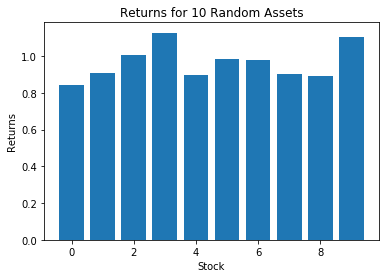

In [28]:
# plot the mean return of each asset
# bar is a function of pyplot

plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));


In [29]:
# generating 𝑁 random weights for each asset in the portfolio

weights = np.random.uniform(0, 1, N)

In [30]:
# rescale the weights so that they all add up to  1

weights = weights/np.sum(weights)

In [31]:
weights

array([0.02279604, 0.00074805, 0.15349399, 0.23152331, 0.09954374,
       0.20023107, 0.02707518, 0.0118973 , 0.10137795, 0.15131337])

calculate the mean return of the portfolio, taking each asset's return by its designated weight. 

use dot() on one-dimensional vector to multiply each element pointwise and add all the products together

# 𝜔⋅𝜇 = 𝜔1𝜇1 + 𝜔2𝜇2 + ⋯ + 𝜔𝑁𝜇𝑁 = 𝜇𝑃


In [32]:
p_returns = np.dot(weights, mean_returns)
print("Expected return of the portfolio: ", p_returns)

Expected return of the portfolio:  1.0160655011639474


calculate the variance of the portfolio, 
as a sum of each individual asset, scaled by its weight


Where  𝑆0,⋯,𝑆𝑁  are the assets contained within our universe

$$VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N]$$

If all of assets were independent of each other, we could simply evaluate as

$$VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2$$


However, all of assets are related to each other; 
the variance has to include the individual pairwise covariances of each asset

$$VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace$$

Where 𝜌𝑖,𝑗 is the correlation between 𝑆𝑖 and 𝑆𝑗, 𝜌𝑖,𝑗= 𝐶𝑂𝑉(𝑆𝑖,𝑆𝑗)/𝜎𝑖𝜎𝑗 

### calculate the covariance matrix that relates all the individual assets

In [33]:
cov_mat = np.cov(returns)
print (cov_mat)

[[0.0007613  0.00077415 0.00072993 0.00072064 0.00077499 0.00074323
  0.00080721 0.00072883 0.00074348 0.00076655]
 [0.00077415 0.0012164  0.0007558  0.00070288 0.000783   0.00074646
  0.00076107 0.00074486 0.00072764 0.00077965]
 [0.00072993 0.0007558  0.00115608 0.00064307 0.00077917 0.00064169
  0.00081801 0.00081075 0.00068303 0.00070793]
 [0.00072064 0.00070288 0.00064307 0.00109145 0.00072565 0.0007269
  0.00078146 0.00061416 0.00072201 0.00073767]
 [0.00077499 0.000783   0.00077917 0.00072565 0.00117878 0.00076688
  0.00077505 0.00079278 0.00080041 0.00073651]
 [0.00074323 0.00074646 0.00064169 0.0007269  0.00076688 0.00110749
  0.00075286 0.00070641 0.00076787 0.00071508]
 [0.00080721 0.00076107 0.00081801 0.00078146 0.00077505 0.00075286
  0.00120229 0.00079607 0.00075337 0.00082467]
 [0.00072883 0.00074486 0.00081075 0.00061416 0.00079278 0.00070641
  0.00079607 0.00113864 0.00069798 0.00073383]
 [0.00074348 0.00072764 0.00068303 0.00072201 0.00080041 0.00076787
  0.00075337 

The 𝑁×𝑁 covariance matrix is of the form:

$$ \left[\begin{matrix}
VAR[S_1] & COV[S_1, S_2] & \cdots & COV[S_1, S_N] \\
COV[S_2, S_1] & VAR[S_2] & \cdots & COV[S_2, S_N] \\
\vdots & \vdots & \ddots & \vdots \\
COV[S_N, S_1] & COV[S_N, S_2] & \cdots & VAR[S_N]
\end{matrix}\right] $$

each diagonal entry is the variance of that asset at that index 
and each off-diagonal holds the covariance of two assets indexed by the column and row number.

using the covariance matrix to calculate the variance as

## $$\sigma_p^2 = \omega \ C \ \omega^\intercal$$

Where  𝐶  is the covariance matrix of all the assets and  𝜔  is the array containing the weights of each individual asset. The superscript  ⊺  on the second  𝜔  listed above denotes the transpose of  𝜔 . 

 𝜔 is 1×𝑁 1-d horizontal array, so 𝜔⊺ is N×1 1-d vertical array.

## Dimensions(𝜎2 𝑝) = Dimensions(𝜔 𝐶 𝜔⊺) = (1×𝑁)⋅(𝑁×𝑁)⋅(𝑁×1)=(1×1)

In [34]:
# Calculating the portfolio volatility

var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print ("Portfolio volatility: ", vol_p)

Portfolio volatility:  0.028064524277432022


In [35]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print ("Portfolio volatility: ", vol_p_alt)

Portfolio volatility:  0.028064524277432012


The parameter is a simple integer input that tells the function the number of degrees of freedom to take into account. This is a more statistical concept, but what this tells is that the matrix calculation is correct!